In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_excel('File.xlsx')
df.head(1)

,srcStateName,srcDistrictName,srcYear,Social group type,Land area size,Category of holdings,Net area sown,Area under current fallows,Net area cultivated,Uncultivated area,YearCode,Year
0,Himachal Pradesh,Una,2015-16,Others,Below 0.5,Marginal,3279.801,448.998,3728.799,2290.641,2015,"Agriculture Year (Jul - Jun), 2015"


In [4]:
print(df.dtypes)
print(df.shape)

srcStateName                   object
srcDistrictName                object
srcYear                        object
Social group type              object
Land area size                 object
Category of holdings           object
Net area sown                 float64
Area under current fallows    float64
Net area cultivated           float64
Uncultivated area             float64
YearCode                        int64
Year                           object
dtype: object
(27160, 12)


In [5]:
print("Null values: ",df.isnull().sum())

Null values:  srcStateName                  0
srcDistrictName               0
srcYear                       0
Social group type             0
Land area size                0
Category of holdings          0
Net area sown                 0
Area under current fallows    0
Net area cultivated           0
Uncultivated area             0
YearCode                      0
Year                          0
dtype: int64


In [6]:
print(df.describe())

       Net area sown  Area under current fallows  Net area cultivated  \
count   27160.000000                27160.000000         27160.000000   
mean     5155.955455                  434.636610          5590.592065   
std     16120.880620                 2216.577641         17448.572950   
min         0.000000                    0.000000             0.000000   
25%         2.500750                    0.000000             3.289750   
50%       166.423000                    0.782500           185.501500   
75%      2729.169250                  105.503250          3087.153500   
max    416650.965000                88847.940000        456618.376000   

       Uncultivated area   YearCode  
count        27160.000000   27160.0  
mean           220.060963    2015.0  
std           1546.072673       0.0  
min              0.000000    2015.0  
25%              0.000000    2015.0  
50%              0.000000    2015.0  
75%             34.535500    2015.0  
max         139837.340000    2015.0  


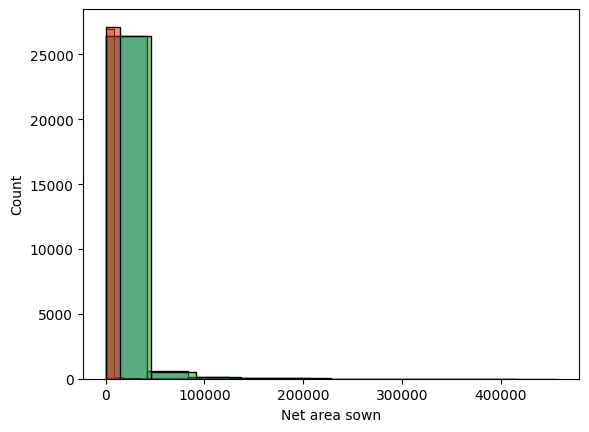

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
columns = ['Net area sown', 'Area under current fallows', 'Net area cultivated', 'Uncultivated area ']

for col in columns:
    sns.histplot(data=df, x=col, kde=False, bins=10, label=col, alpha=0.5)

plt.show()

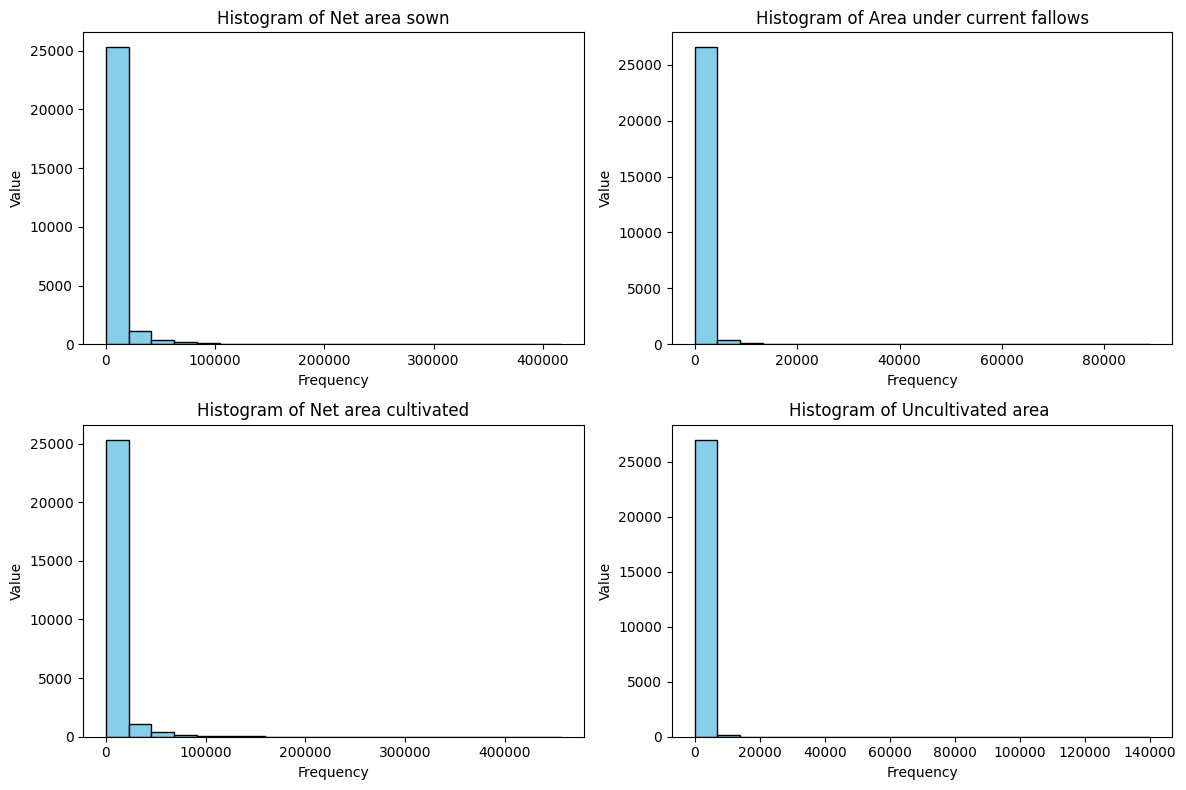

In [8]:
columns = ['Net area sown', 'Area under current fallows', 'Net area cultivated', 'Uncultivated area ']
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 2 rows, 2 columns

axes = axes.flatten()  # flatten to loop easily

for i, col in enumerate(columns):
    axes[i].hist(df[col], bins=20,color='skyblue', edgecolor='black')
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel('Frequency')
    axes[i].set_ylabel('Value')

plt.tight_layout()
plt.show()


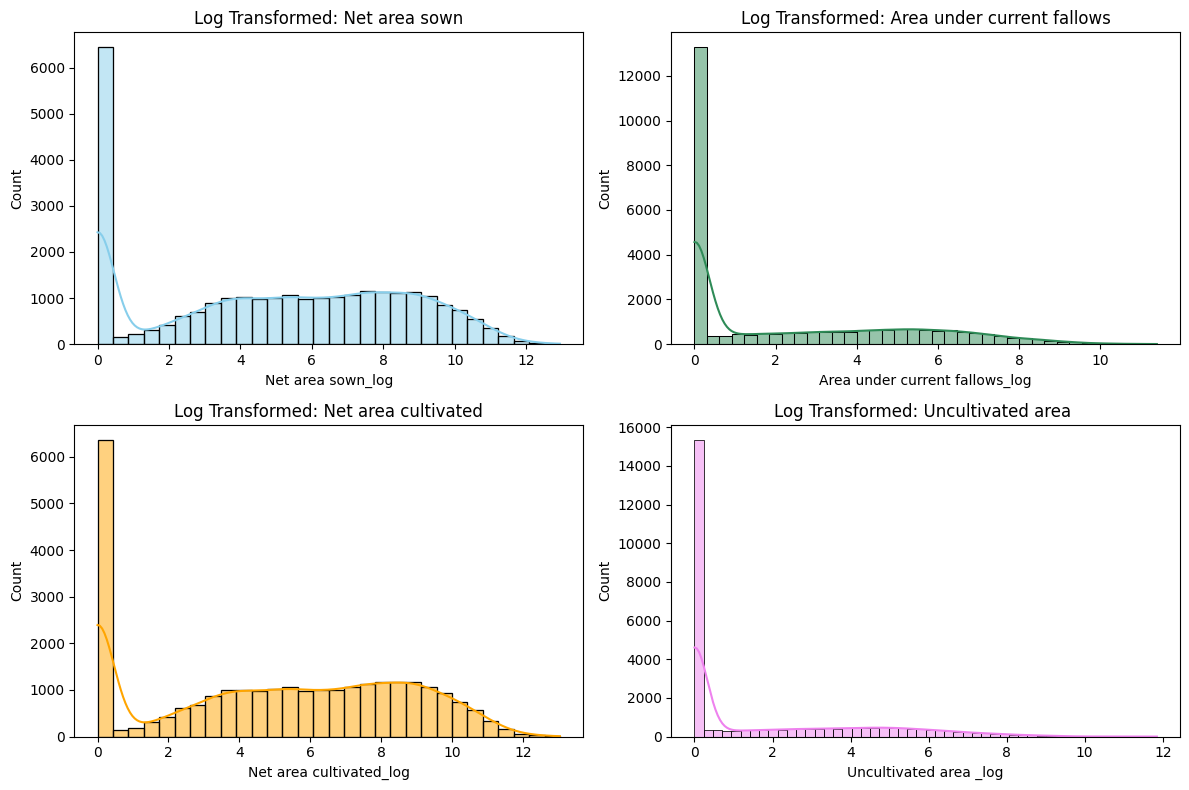

In [9]:
columns = ['Net area sown', 'Area under current fallows', 'Net area cultivated', 'Uncultivated area ']

for col in columns:
    df[col + '_log'] = np.log(df[col] + 1)
fig, axes = plt.subplots(2,2, figsize=(12, 8))
axes=axes.flatten()
colors = ['skyblue', 'seagreen', 'orange', 'violet']  

for i, col in enumerate(columns):
    sns.histplot(data=df, x=col + '_log', ax=axes[i], kde=True, color=colors[i])
    axes[i].set_title(f'Log Transformed: {col}')

plt.tight_layout()
plt.show()

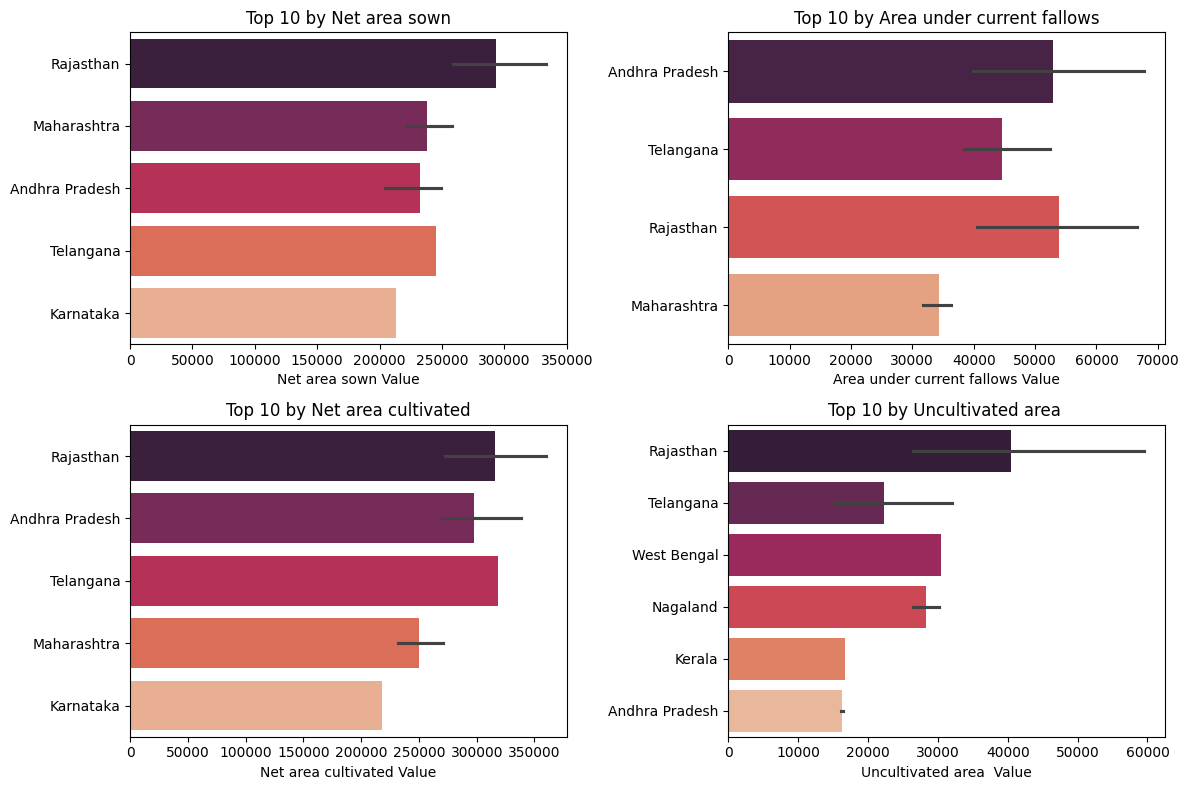

In [10]:
columns = ['Net area sown', 'Area under current fallows', 'Net area cultivated', 'Uncultivated area ']
category = 'srcStateName'  
# Create 2x2 subplot
fig, axes = plt.subplots(2, 2, figsize=(12,8))
axes = axes.flatten()

# Create each horizontal bar plot
for i, col in enumerate(columns):
    sns.barplot(
        data=df.sort_values(by=col, ascending=False).head(25),  
        x=col,
        y=category,
        ax=axes[i],
        hue=category,
        palette='rocket'  # You can use 'mako', 'viridis', 'flare', etc.
    )
    axes[i].set_title(f'Top 10 by {col}')
    axes[i].set_xlabel(f'{col} Value')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

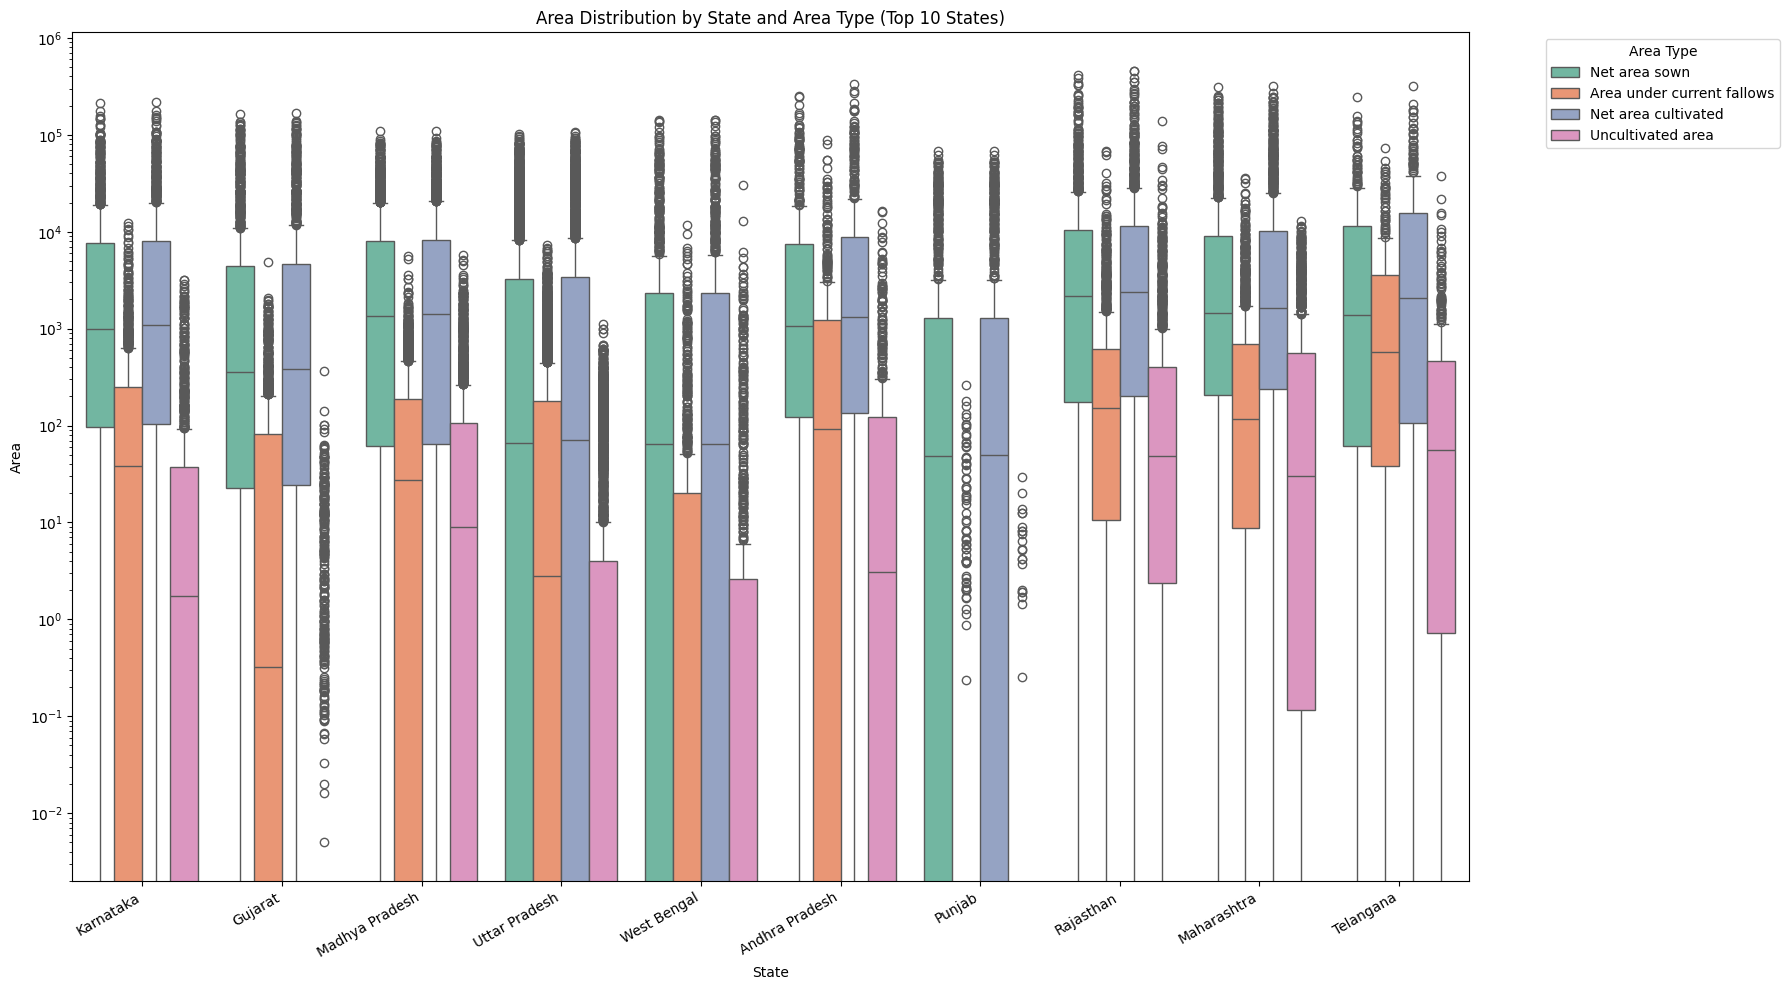

In [11]:
# Filter top 10 states by average Net area sown
top_states = df.groupby('srcStateName')['Net area sown'].mean().nlargest(10).index
df_melted = df[df['srcStateName'].isin(top_states)][['srcStateName', 'Net area sown', 'Area under current fallows', 'Net area cultivated', 'Uncultivated area ']] \
    .melt(id_vars='srcStateName', var_name='Area Type', value_name='Area')

# Plot
plt.figure(figsize=(18, 10))
sns.boxplot(x='srcStateName', y='Area', hue='Area Type', data=df_melted, palette='Set2')
plt.yscale('log')
plt.xticks(rotation=30, ha='right')
plt.title('Area Distribution by State and Area Type (Top 10 States)')
plt.xlabel('State'); plt.ylabel('Area')
plt.legend(title='Area Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


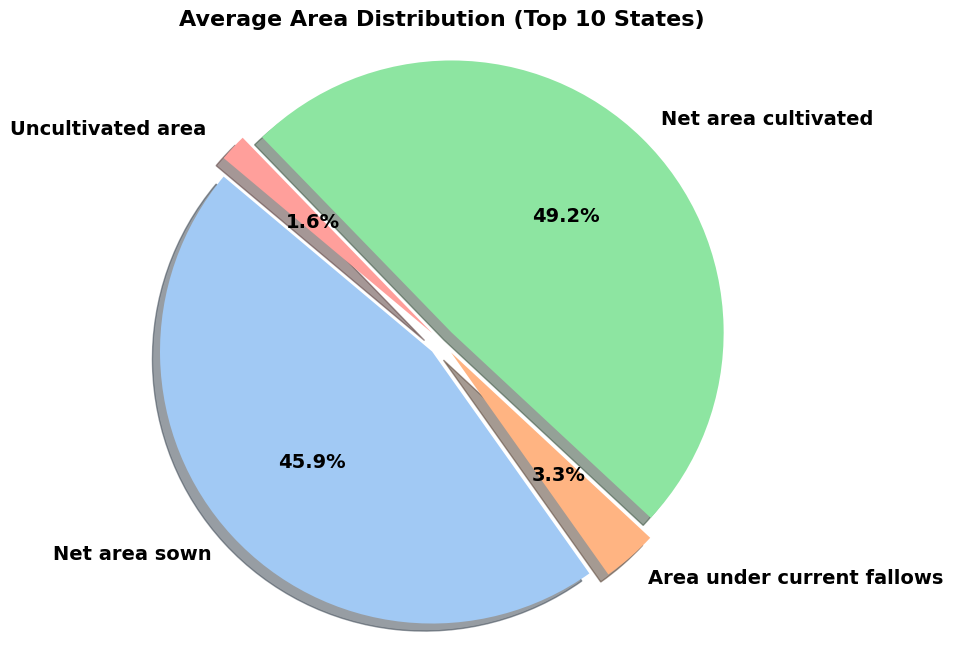

In [12]:
# 1. Take only the top 10 states based on Net area sown
top_states = df.groupby('srcStateName')['Net area sown'].mean().nlargest(10).index
df_top = df[df['srcStateName'].isin(top_states)]

# 2. Find average values of area types in these top states
area_avg = df_top[['Net area sown', 'Area under current fallows',
                   'Net area cultivated', 'Uncultivated area ']].mean()

# 3. Set design for pie chart
explode = [0.05] * len(area_avg)  # separates each slice a bit
colors = sns.color_palette("pastel")  # soft, attractive colors

# 4. Create the pie chart
plt.figure(figsize=(8,8))
plt.pie(area_avg, labels=area_avg.index,
        autopct='%1.1f%%',  # show percent values
        startangle=140,     # rotate for better layout
        explode=explode,    # apply separation
        shadow=True,        # add shadow effect
        colors=colors,      # use custom colors
        textprops={'fontsize': 14, 'weight': 'bold'})  # make labels bold

# 5. Add title and show chart
plt.title('Average Area Distribution (Top 10 States)', fontsize=16, fontweight='bold')
plt.axis('equal')  # keep it circular
plt.show()


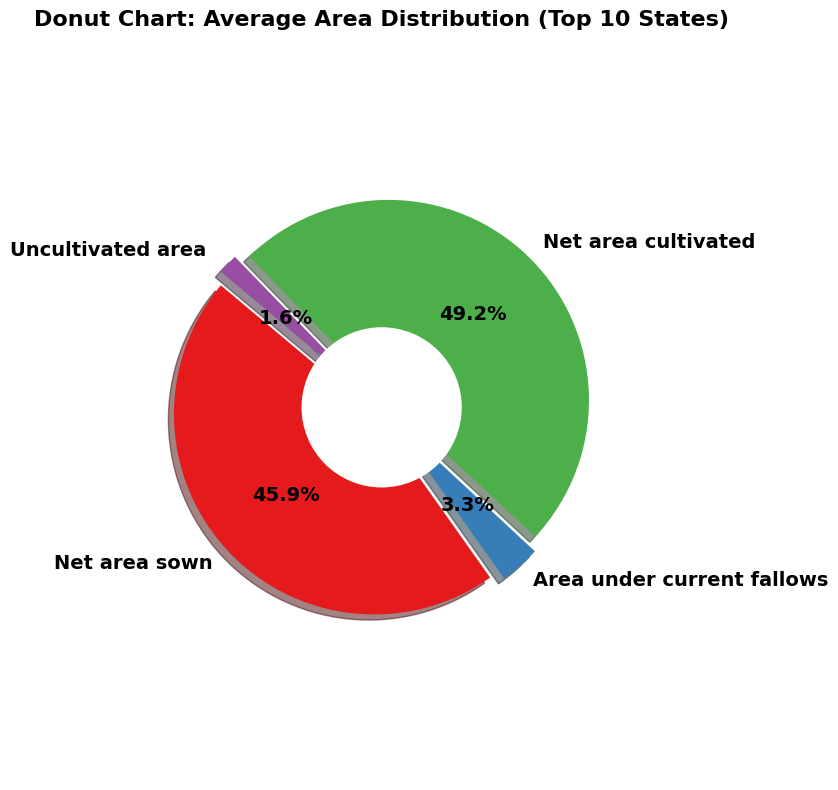

In [13]:

# Step 1: Get average values of area types for top 10 states
top_states = df.groupby('srcStateName')['Net area sown'].mean().nlargest(10).index
df_top = df[df['srcStateName'].isin(top_states)]
area_avg = df_top[['Net area sown', 'Area under current fallows',
                   'Net area cultivated', 'Uncultivated area ']].mean()

# Step 2: Styling settings
explode = [0.05] * len(area_avg)  # to pop out the slices
colors = sns.color_palette("Set1")  # soft and modern color palette

# Step 3: Create donut chart
plt.figure(figsize=(8,8))
wedges, texts, autotexts = plt.pie(area_avg,
                                   labels=area_avg.index,
                                   autopct='%1.1f%%',
                                   startangle=140,
                                   explode=explode,
                                   shadow=True,
                                   colors=colors,
                                   textprops={'fontsize': 14, 'weight': 'bold'})

# Step 4: Draw a white circle in the center to make it a donut
centre_circle = plt.Circle((0, 0), 0.40, fc='white')
plt.gca().add_artist(centre_circle)

# Step 5: Add title
plt.title('Donut Chart: Average Area Distribution (Top 10 States)', fontsize=16, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures the chart is circular
plt.tight_layout()
plt.show()


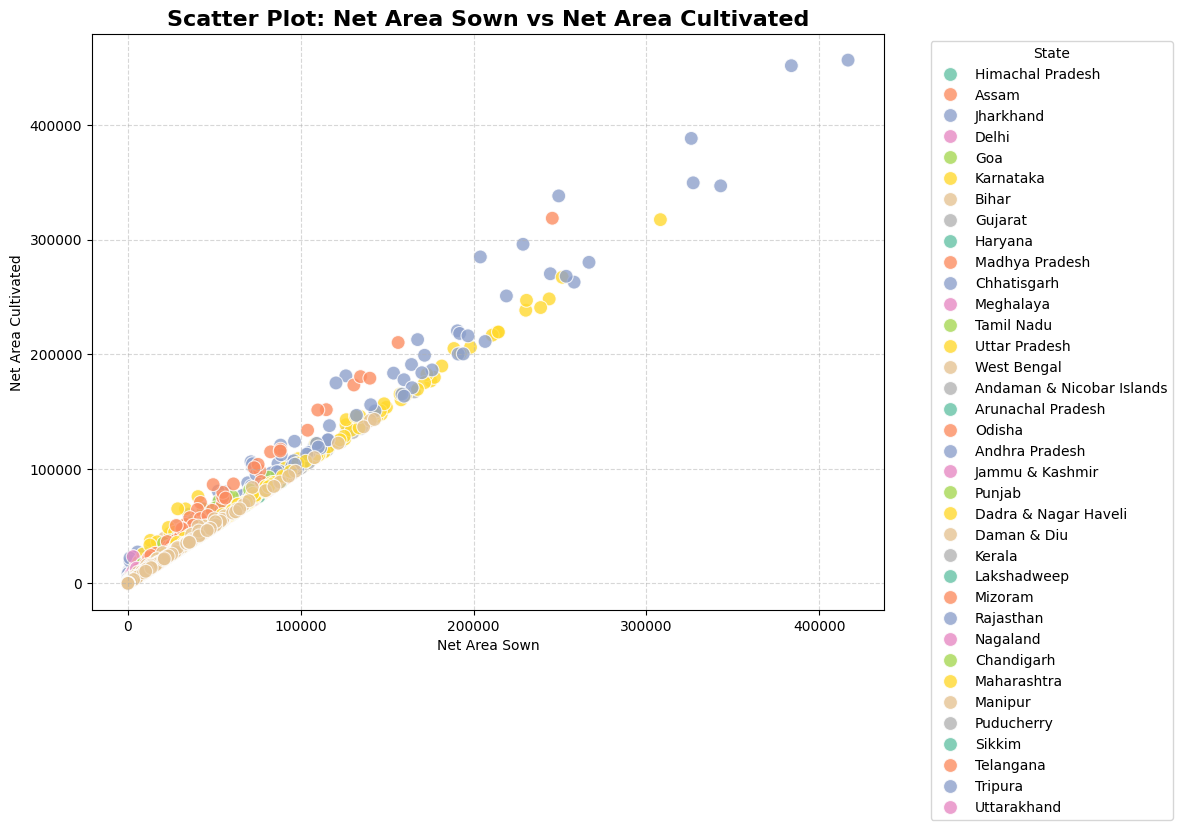

In [14]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    data=df,
    x='Net area sown',
    y='Net area cultivated',
    hue='srcStateName',
    palette='Set2',
    s=100,  # size of the dots
    alpha=0.8  # transparency
)

plt.title('Scatter Plot: Net Area Sown vs Net Area Cultivated', fontsize=16, fontweight='bold')
plt.xlabel('Net Area Sown')
plt.ylabel('Net Area Cultivated')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='State')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


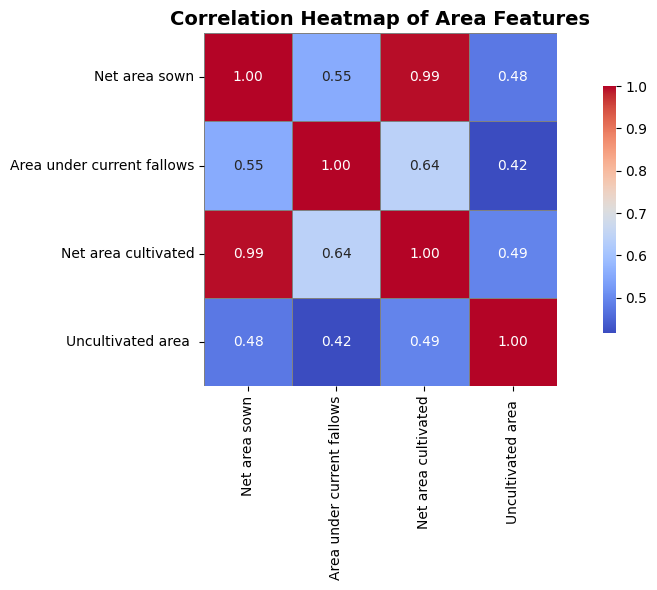

In [15]:
# Step 1: Select numeric columns
num_cols = ['Net area sown', 'Area under current fallows', 'Net area cultivated', 'Uncultivated area ']

# Step 2: Create correlation matrix
corr = df[num_cols].corr()

# Step 3: Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, linecolor='gray', square=True, cbar_kws={'shrink': 0.7})
plt.title('Correlation Heatmap of Area Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


HYPOTHESIS TESTING

In [16]:
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.weightstats import ztest


In [17]:
# Filter the sample (e.g., for Punjab)
sample = df[df['srcStateName'] == 'Punjab']['Net area sown'].dropna()

# Perform z-test: testing if Punjab's mean = national mean
z_stat, p_val = ztest(sample, value=df['Net area sown'].mean())
print(f"Z-Test: z = {z_stat:.2f}, p = {p_val:.4f}")


Z-Test: z = -1.91, p = 0.0565


In [18]:
from scipy.stats import ttest_ind

# Filter Net Area Sown for Punjab and Haryana
punjab = df[df['srcStateName'] == 'Punjab']['Net area sown']
haryana = df[df['srcStateName'] == 'Haryana']['Net area sown']

# Perform Independent T-Test
t_stat, p_val = ttest_ind(punjab, haryana, equal_var=False)  # Welch's t-test

print(f"T-Test: t = {t_stat:.2f}, p = {p_val:.4f}")


T-Test: t = 0.41, p = 0.6783


In [19]:
from scipy.stats import f

# Get variances
var_punjab = punjab.var()
var_haryana = haryana.var()

# Calculate F-statistic
f_stat = var_punjab / var_haryana if var_punjab > var_haryana else var_haryana / var_punjab

# Degrees of freedom
df1 = len(punjab) - 1
df2 = len(haryana) - 1

# p-value for F-distribution
p_val_f = 1 - f.cdf(f_stat, df1, df2)

print(f"F-Test: F = {f_stat:.2f}, p = {p_val_f:.4f}")


F-Test: F = 1.15, p = 0.0201


In [22]:
from sklearn.linear_model import LinearRegression

# Create and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Prediction and evaluation
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Results:")
print("Mean Squared Error:", mse_lr)
print("R-squared Score:", r2_lr)


Linear Regression Results:
Mean Squared Error: 8.276121121713509e-20
R-squared Score: 1.0


In [32]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train-Test Split
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# 2. Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# 3. Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

# Print Results
print("Model Comparison Results:")
print(f"\n🔹 Random Forest\nMSE: {mse_rf:.2f}\nR² Score: {r2_rf:.5f}")
print(f"\n🔹 Linear Regression\nMSE: {mse_lr:.2f}\nR² Score: {r2_lr:.5f}")
print(f"\n🔹 Gradient Boosting\nMSE: {mse_gb:.2f}\nR² Score: {r2_gb:.5f}")


Model Comparison Results:

🔹 Random Forest
MSE: 3048502.18
R² Score: 0.99053

🔹 Linear Regression
MSE: 0.00
R² Score: 1.00000

🔹 Gradient Boosting
MSE: 840711.06
R² Score: 0.99739


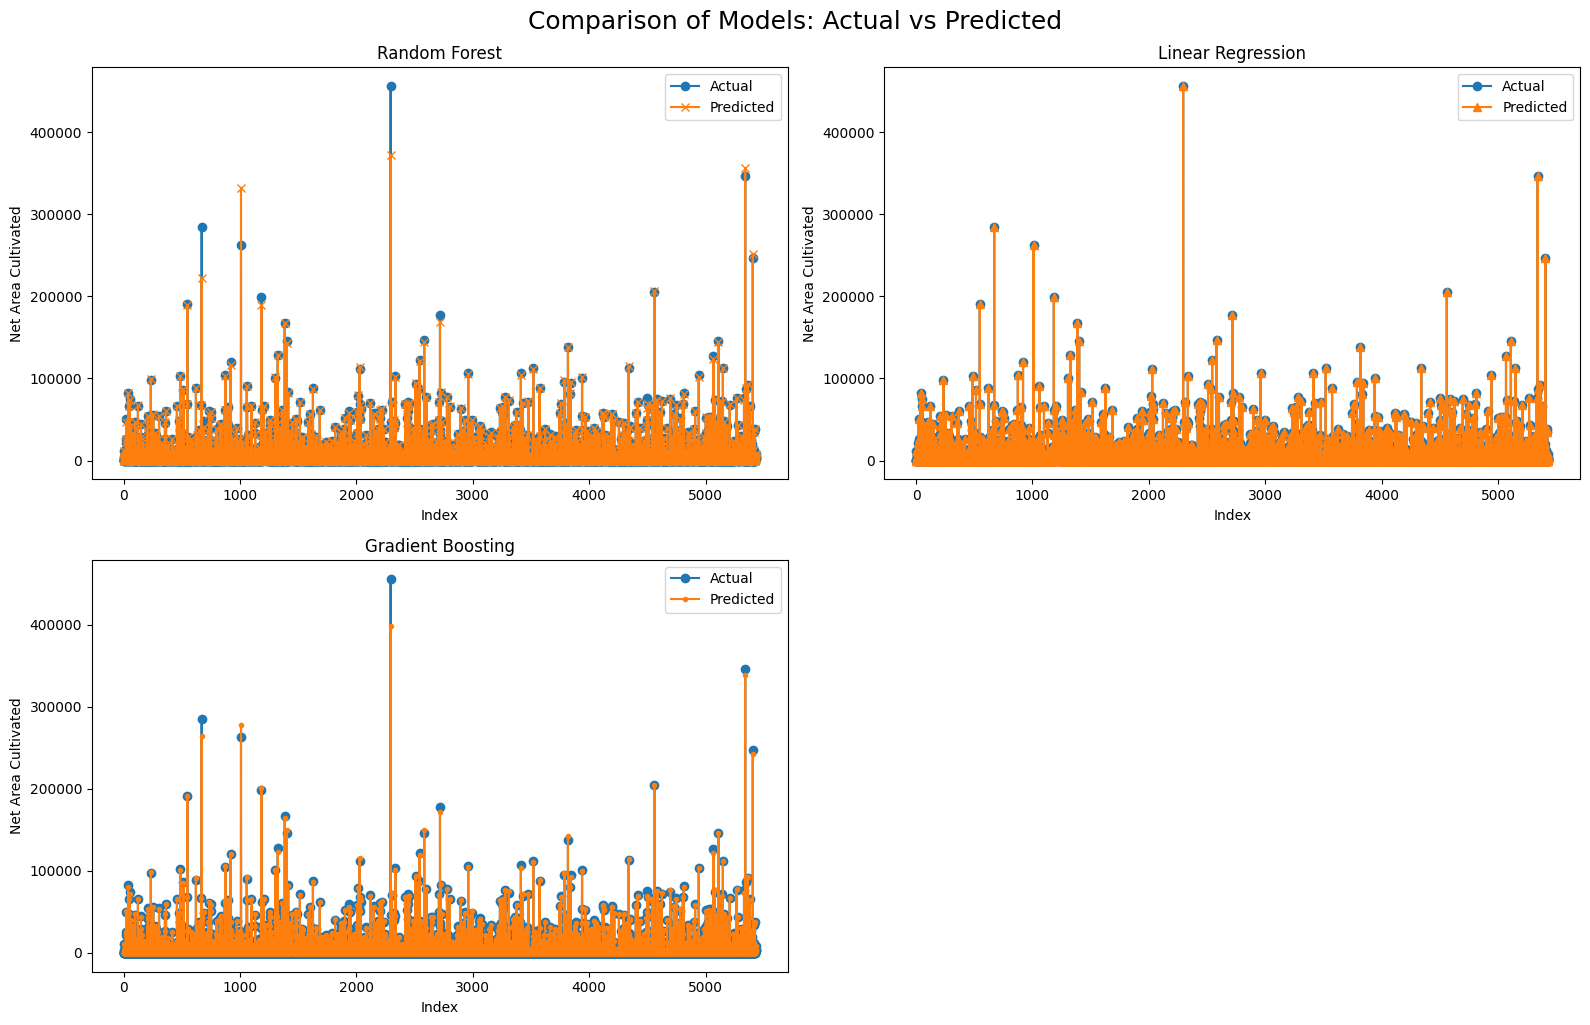

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 10))

# Random Forest Plot - Top Left
plt.subplot(2, 2, 1)
plt.plot(y_test.values, label='Actual', marker='o')
plt.plot(y_pred, label='Predicted', marker='x')
plt.title('Random Forest')
plt.xlabel('Index')
plt.ylabel('Net Area Cultivated')
plt.legend()
plt.tight_layout()

# Linear Regression Plot - Top Right
plt.subplot(2, 2, 2)
plt.plot(y_test.values, label='Actual', marker='o')
plt.plot(y_pred_lr, label='Predicted',  marker='^')
plt.title('Linear Regression')
plt.xlabel('Index')
plt.ylabel('Net Area Cultivated')
plt.legend()
plt.tight_layout()

# Gradient Boosting Plot - Bottom Center
plt.subplot(2, 2, 3)
plt.plot(y_test.values, label='Actual', marker='o')
plt.plot(y_pred_gb, label='Predicted', marker='.')
plt.title('Gradient Boosting')
plt.xlabel('Index')
plt.ylabel('Net Area Cultivated')
plt.legend()
plt.tight_layout()

plt.suptitle('Comparison of Models: Actual vs Predicted', fontsize=18, y=1.02)
plt.show()
